# Working with FITS files
The standard data file format used by astronomers is called FITS ([Flexible Image Transport System](https://fits.gsfc.nasa.gov)). FITS files can contain just about any kind of data you can imagine, but here we are mainly interested in accessing imaging data stored in a FITS format. Each image stored in a FITS file consists of two parts. The image data itself is stored two-dimentional array of numbers, but there is also a human readable header file that contains metadata about the image. 

## HDUs
A FITS file can actually contain more than one image. Each image is stored in a Header/Data Unit (HDU). Often there is only one image so there is only one HDU in the file.

## FITS headers
Examples of metadata are stored in the header are the dimenions of the image (1024 by 1024 pixels for example). The header might also contain information about the observatory, detector, and filters used to take the data. 

Each record in the header can only be 80 [ASCII](https://en.wikipedia.org/wiki/ASCII) long and must be of the format
```
KEYWORD = value / comment string
```

The simpilist header for a two-dimensional would have the following `KEYWORDS`:

```
SIMPLE  =                     T / file conforms to FITS standard
BITPIX  =                    16 / number of bits per data pixel
NAXIS   =                     2 / number of data axes
NAXIS1  =                  1024 / length of data axis 1
NAXIS2  =                  1024 / length of data axis 2
```

FITS keywords are always in capital letters and can be no more than eight characters long.

## Image data
The image data part of the HDU is in binary format and isn't human readable. The image data can be stored as integers or floating point numbers. The image data format is specified by the `BITPIX` header keyword . For example, `BITPIX  = 16` means the image data is written as 16-bit integers.  

# Using Astropy to access FITS files
The Astropy Project is a open-source community effort to develop astronomical tools in Python. The Astropy package is included in the Anaconda distribution of Python. The core Astropy package contains code that allows you to preform most of the basic tasks needed to process astronomical data. In this tutorial, you will learn how to:
- open and load FITS file HDUs to local variables
- read information from the FITS header
- change the values of FITS header keywords
- display the image data using `matplotlib`
- write new FITS files

## Loading the FITS header and image data 
The first step is to import the needed Python modules.

In [1]:
# set-up for inline image display
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Set up a nice image display style. 
# See https://matplotlib.org/stable/tutorials/introductory/customizing.html for more information.
plt.style.use('im_disp.mplstyle') 

from astropy.io import fits

The `%matplotlib inline` command causes the images and plots from matplotlib to be plotted in this notebook.

Now let's open the image of M 51 stored in the `images` directory.

In [2]:
image_file_path = 'images/M51_R_p.fits'
hdu_list = fits.open(image_file_path)
hdu_list.info()

Filename: images/M51_R_p.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     143   (2046, 2046)   float32   


The `fits.open()` method returns a list of HDU objects. The `hdu_list.info()` method returns information about the HDU's in the file. In this case the file only contains one HDU with a 2046 by 2046 image.

Now lets save the header and image data for the `PrimaryHDU` (the only HDU in this FITS file).

In [3]:
header_data = hdu_list[0].header
image_data = hdu_list[0].data

We have saved the header and image data to variables so can now close the FITS file. 

In [4]:
hdu_list.close()

## Reading and editing the FITS header information
Let's display the entire header.

In [5]:
header_data

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 2046 / Axis length                                    
NAXIS2  =                 2046 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2013-05-06T16:16:28' / Date FITS file was generated                  
IRAF-TLM= '2013-05-06T16:16:28' / Time of last modification                     
OBJECT  = 'm51     '           / Name of the object observed                    
BUNIT   = 'ADU     '           / pixel units(ADU,electrons)                     
CTYPE1  = 'LINEAR  '           / Axis Type for NAXIS1                           
CRPIX1  =                 -5

There are many keywords in this file's header. Fortunatly, it is easy to access the value associated with any keyword because the `header_data` object works like a Python dictionary. To access the value of any FITS keyword we use the keyword as the index. For example, to display the dimensions of the image we can just print the values of the `NAXIS1` and `NAXIS1` keywords.

In [6]:
print(header_data['NAXIS1'])
print(header_data['NAXIS2'])

2046
2046


The keywork `OBJECT` contains the name of the observed object.

In [7]:
header_data['OBJECT']

'm51'

Let's change the object name to `M51 Whirlpool Galaxy`. Since the `header_data` object works like a Python dictionary this is easy to do.

In [8]:
header_data['OBJECT'] =  'M51 Whirlpool Galaxy'
header_data['OBJECT']

'M51 Whirlpool Galaxy'

Keep in mind that we haven't changed the original file. We've just changed the value of the local variable `header_data['OBJECT']`. We'll see how to write this out to a new FITS file in the last section of this tutorial.

## Displaying image data
The `image_data` is stored as a 2D numpy array.

In [9]:
type(image_data)

numpy.ndarray

We can use the [`matplotlib.pyplot.imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) command to display the image.

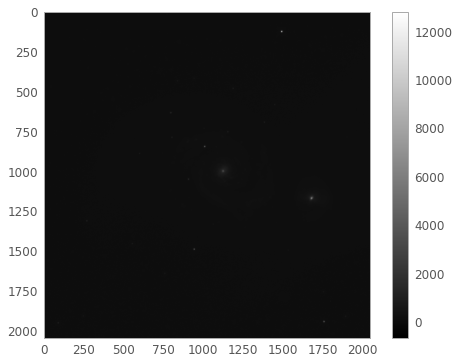

In [10]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

The grayscale map is set automatically so that the largest pixel value in the image is set to white and the smallest pixel value is set to black. Let's change the scaling to bring out the galaxy's faint spiral arms.

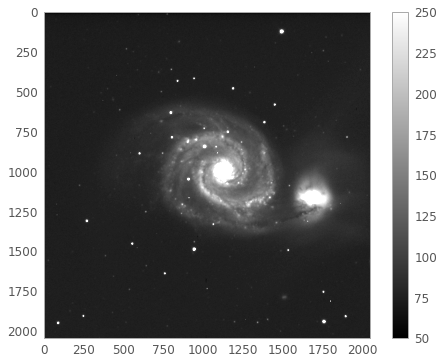

In [11]:
plt.imshow(image_data, cmap='gray',vmin=50,vmax=250)
plt.colorbar()

The `cmap` named argument in the `imshow` command sets the colormap. When you set `cmap='gray'` you get a linear scaled image from black to white. You can get a negative image by setting `cmap='Greys'`.

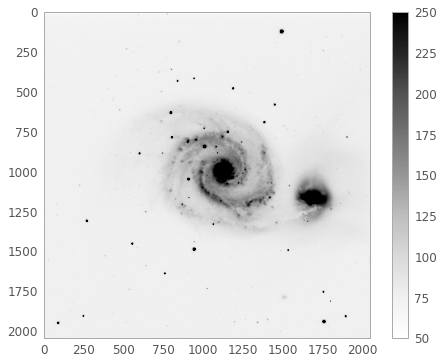

In [12]:
plt.imshow(image_data, cmap='Greys',vmin=50,vmax=250)
plt.colorbar()

There are a huge selection of false color mappings availible to you. The [Coloramap Reference page](https://matplotlib.org/stable/gallery/color/colormap_reference.html) on the Matplotlib website has a complete list of colormaps. Below is one example with the colorbar showing the pixel value mapping.

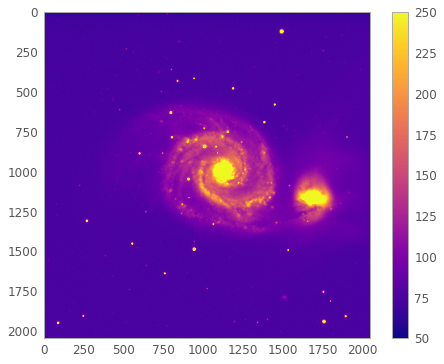

In [13]:
plt.imshow(image_data, cmap='plasma',vmin=50,vmax=250)
plt.colorbar()

We can also use a logrithmic mapping to bring out faint details in an image. We do this by importing `LogNorm` from `matplotlib.colors` and passing `LogNorm` to the `norm` argument. We set the maximum and minimum pixel values by passing `vmin` and `vmax` to `LogNorm`.

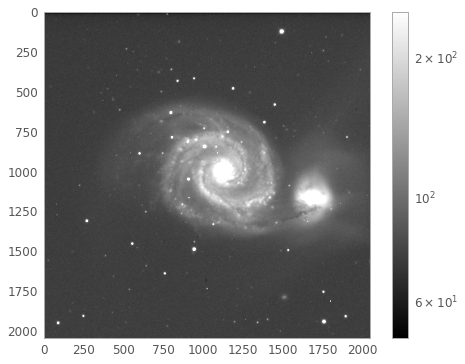

In [14]:
from matplotlib.colors import LogNorm
plt.imshow(image_data, cmap='gray', norm=LogNorm(vmin=50,vmax=250))
plt.colorbar()

## Writing FITS files
We can write out a new FITS file using [`astropy.io.fits.writeto`](https://docs.astropy.org/en/stable/io/fits/api/files.html#astropy.io.fits.writeto). 

In [15]:
new_file_path = 'images/M51File_example.fits'
fits.writeto(new_file_path, image_data, header_data, overwrite=True)

Unless you set `overwrite=True` you will receive an error if the file you are trying to write already exists. 

# Summary
We've seen how to use [`astropy.io.fits`](https://docs.astropy.org/en/stable/io/fits/) to access the header and data in a FITS file, modify header information, display the image data, and write out a new FITS file, but we've only scrached the surface. You can learn more from the Astropy Tutorials [Edit a FITS header](https://learn.astropy.org/rst-tutorials/FITS-header.html?highlight=filtertutorials) and [Viewing and manipulating FITS images](https://learn.astropy.org/rst-tutorials/FITS-images.html?highlight=filtertutorials) on the [https://learn.astropy.org](https://learn.astropy.org) website. I've included the Python script `FITS_read_write.py` in the code directory. Feel free to modify that program and use it to write your own programs to read and write FITS files.